
# Project: Investigate a Dataset - [No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This project focuses on analysis of the [No_show_appointments]( https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv.) dataset from kaggle. The dataset is a csv file that collects information from 110527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. This project aims at exploring and analyzing this dataset and describing how different characteristic feature of each patient affect their attendance of the medical appointment.


### Question(s) for Analysis

<ol>
    <li>Which age group attended their appointment the most?</li>
    <li>Among patients with hypertension, those with diabetes and those suffering from alcoholism, which group showed for their appointment the most?</li>
    <li>Did sending a sms affect the attendance of the patient of their medical appointment?</li>
</ol>
 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Surveying the dataset to note its features**

In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

#### Checking data to see if it contains missing values, duplicate rows, and incorrect values

In [7]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>All columns in this dataset has are filled with 110527 values, this implies that no value is missing in the data.

In [8]:
#inspecting dataset for duplicate values
sum(df.duplicated())

0

>The dataset is free from duplicates

In [9]:
#checking for incorrect data.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>Here it can be noticed that the min value of the age column has negative values, which is not expected for an individual's age. This will be rectified in the next session.

In [10]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [11]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])

In [12]:
for columns in df:
    print (columns, df[columns].unique())
    print('\n')

PatientId [  2.98724998e+13   5.58997777e+14   4.26296230e+12 ...,   7.26331493e+13
   9.96997666e+14   1.55766317e+13]


AppointmentID [5642903 5642503 5642549 ..., 5630692 5630323 5629448]


Gender ['F' 'M']


ScheduledDay ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...,
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']


AppointmentDay ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016

>Here it can be noticed that all other columns other than Age contains the right and relevant datatype. The column for age has an incorrect value of -1.


### Data Cleaning
 

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


#### The incorrect value in the Age column will be changed to the mean of the age column here.

In [14]:
age_mean = df.Age.mean().astype(int)
age_mean

37

In [15]:
df.loc[df['Age'] == -1, 'Age'] = age_mean

#### Renaming the columns to ensure uniformity.

In [16]:
new_column_names = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 'appointment-day', 'age', 'neighbourhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show']
df.columns = new_column_names
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment-day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### General dataset overview
Here the statistics of each unique value in each column is being analyzed

In [17]:
df.describe()


,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.089218,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [18]:
#defining a function to plot histograms
def plot_hist(dataframe, x_label, y_label, title):
    hist = plt.hist(dataframe, alpha = 0.75)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    print(plt.show())

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#Histograms to show the statistics of each column of the dataset


In [20]:
#checking the percentage of unique value in each column
for col in df:
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

8.221459e+14    0.079619
9.963767e+10    0.076000
2.688613e+13    0.063333
3.353478e+13    0.058809
2.584244e+11    0.056095
7.579746e+13    0.056095
8.713749e+14    0.056095
6.264199e+12    0.056095
6.684488e+13    0.051571
8.722785e+11    0.049762
8.923969e+13    0.048857
8.435224e+09    0.046143
8.534397e+14    0.045238
1.447997e+13    0.041619
6.543360e+13    0.041619
8.189452e+13    0.038000
9.452745e+12    0.038000
1.882323e+14    0.036190
9.496197e+12    0.034381
2.271580e+12    0.034381
1.336493e+13    0.033476
1.484143e+12    0.031666
8.883500e+13    0.030762
9.861628e+14    0.030762
7.124589e+14    0.029857
4.167557e+14    0.027143
6.128878e+12    0.027143
8.121397e+13    0.026238
8.634164e+12    0.021714
3.699499e+13    0.020809
                  ...   
6.375629e+12    0.000905
9.369127e+12    0.000905
5.375556e+14    0.000905
1.662184e+11    0.000905
7.234615e+13    0.000905
9.649990e+12    0.000905
6.912783e+10    0.000905
1.954265e+13    0.000905
2.736377e+10    0.000905


**from this we can deduce the following statistics:**
> <ul>
    <li>80% of the patient attended their appointment</li>
    <li>32% of the patient recieved an sms</li>
    <li>3% had issues related to alcoholism</li>
    <li>7% had diabetes</li>
    <li>20% had hypertension</li>
    <li>10% were on scholarship</li>
    <li>65% were women</li>
</ul>

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 ( Which age group attended their appointment the most?)

In [21]:
# a new column is created that classifies age into age groups.
age_edges = [-1, 12, 19, 39, 60, 120]
age_group_names = ['children', 'teenagers', 'young_adults', 'adults', 'senior_adults']

df['age_groups'] = pd.cut(df['age'], age_edges, labels=age_group_names)
df['age_groups']

0         senior_adults
1                adults
2         senior_adults
3              children
4                adults
5         senior_adults
6          young_adults
7          young_adults
8          young_adults
9             teenagers
10         young_adults
11         young_adults
12         young_adults
13         young_adults
14               adults
15            teenagers
16               adults
17               adults
18         young_adults
19               adults
20         young_adults
21             children
22            teenagers
23               adults
24        senior_adults
25               adults
26               adults
27             children
28               adults
29         young_adults
              ...      
110497    senior_adults
110498           adults
110499    senior_adults
110500           adults
110501           adults
110502     young_adults
110503    senior_adults
110504         children
110505           adults
110506         children
110507         c

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment-day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
age_groups         110527 non-null category
dtypes: category(1), float64(1), int64(8), object(5)
memory usage: 11.9+ MB


In [23]:
#counts for the each age_groups and no_show
age_groups_attendance_count_1 = df.groupby(['age_groups','no_show']).size()
age_groups_attendance_count_1

age_groups     no_show
children       No         16729
               Yes         4307
teenagers      No          6941
               Yes         2434
young_adults   No         22191
               Yes         6680
adults         No         25591
               Yes         5892
senior_adults  No         16756
               Yes         3006
dtype: int64

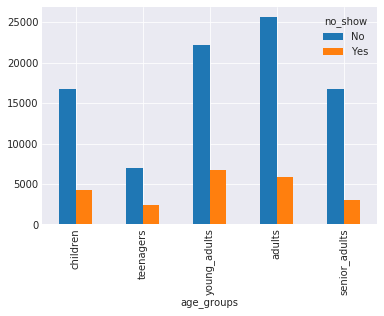

In [24]:
#bar plot to show yes and no values for each age_groups
age_groups_attendance_count= age_groups_attendance_count_1.unstack()
age_groups_attendance_count.plot(kind='bar');

#### A better visualisation of the percentage of attendance of each age group.

In [25]:
#age_group total counts
age_groups_total_counts= df.groupby('age_groups').count()['age']
age_groups_total_counts

age_groups
children         21036
teenagers         9375
young_adults     28871
adults           31483
senior_adults    19762
Name: age, dtype: int64

##### getting the percentage  of each age group

In [26]:
children_percentage = age_groups_attendance_count_1['children']*100/age_groups_total_counts['children']
children_percentage

no_show
No     79.525575
Yes    20.474425
dtype: float64

In [27]:
teenagers_percentage = age_groups_attendance_count_1['teenagers']*100/age_groups_total_counts['teenagers']
teenagers_percentage

no_show
No     74.037333
Yes    25.962667
dtype: float64

In [28]:
young_adults_percentage = age_groups_attendance_count_1['young_adults']*100/age_groups_total_counts['young_adults']
young_adults_percentage

no_show
No     76.862596
Yes    23.137404
dtype: float64

In [29]:
adults_percentage = age_groups_attendance_count_1['adults']*100/age_groups_total_counts['adults']
adults_percentage

no_show
No     81.285138
Yes    18.714862
dtype: float64

In [30]:
senior_adults_percentage = age_groups_attendance_count_1['senior_adults']*100/age_groups_total_counts['senior_adults']
senior_adults_percentage

no_show
No     84.788989
Yes    15.211011
dtype: float64

From this we can deduce the following stastics:
<ul>
<li>80% of patients in the children age group attended their appointments
<li>74% of patients in the teenagers age group attended their appointments
<li>77% of patients in the young adult age group attended their appointments
<li>82% of patients in the adult age group attended their appointments
<li>85% of patients in the senior adult age group attended their appointments
</ol>

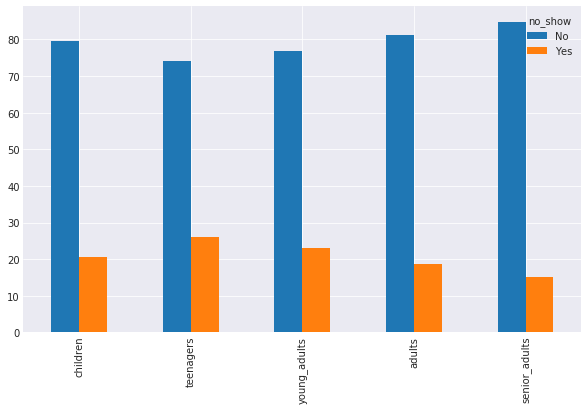

In [31]:
#plotting a barchart for the percentage of attendance in each age_group
frames = [children_percentage, teenagers_percentage, young_adults_percentage, adults_percentage, senior_adults_percentage]
result = pd.concat(frames, keys=['children', 'teenagers', 'young_adults', 'adults', 'senior_adults'])
result.unstack().plot(kind='bar', figsize=(10,6));

### Research Question 2  (Among patients with hypertension, those with diabetes and those suffering from alcoholism, which group showed for their appointment the most?)

In [32]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.089218,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Here the counts of appointments and those attended for each medical issue are computed and a barchart is plotted to compare the percentage with each issue that attended their appointment.

##### Exploratory Data Analysis for hypertensive patients

In [33]:
#attendace statistics for patients with hypertension
hypertension_attendance_count = df.groupby(['hypertension','no_show']).size()
hypertension_attendance_count

hypertension  no_show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
dtype: int64

In [34]:
#total number of patients with hypertension 
hypertension_attendance_total = hypertension_attendance_count[1].sum()
hypertension_attendance_total

21801

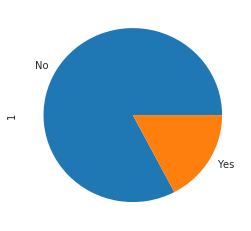

In [35]:
#piechart to compare the number of hypertensive patients who showed up and didn't show up for their appointment
hypertension_attendance_count.unstack().iloc[1].plot(kind = 'pie',figsize=(4,4));

In [36]:
#percentage of hypertensive patient who attended and didn't attend their appointment
hypertension_attendance_percentage = hypertension_attendance_count[1]*100/hypertension_attendance_total
hypertension_attendance_percentage

no_show
No     82.698041
Yes    17.301959
dtype: float64

##### Exploratory Data Analysis for diabetic patients

In [37]:
#attendace statistics for patients with diabetes
diabetes_attendance_count = df.groupby(['diabetes','no_show']).size()
diabetes_attendance_count

diabetes  no_show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
dtype: int64

In [38]:
#total number of patients with diabetes
diabetes_attendance_total = diabetes_attendance_count[1].sum()
diabetes_attendance_total

7943

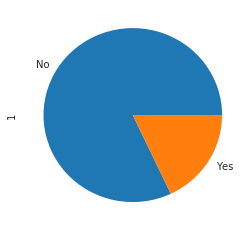

In [39]:
#piechart to compare the number of diabetic patients who showed up and didn't show up for their appointment
diabetes_attendance_count.unstack().iloc[1].plot(kind = 'pie',figsize=(4,4));

In [40]:
#percentage of diabetic patient who attended and didn't attend their appointment
diabetes_attendance_percentage = diabetes_attendance_count[1]*100/diabetes_attendance_total
diabetes_attendance_percentage

no_show
No     81.996727
Yes    18.003273
dtype: float64

##### Exploratory Data Analysis for alcoholic patients

In [41]:
alcoholism_attendance_count = df.groupby(['alcoholism','no_show']).size()
alcoholism_attendance_count

alcoholism  no_show
0           No         85525
            Yes        21642
1           No          2683
            Yes          677
dtype: int64

In [42]:
#total number of patients with alcoholism
alcoholism_attendance_total = alcoholism_attendance_count[1].sum()
alcoholism_attendance_total

3360

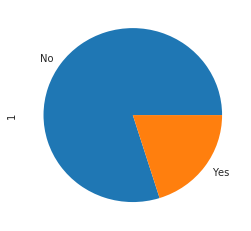

In [43]:
#piechart to compare the number of alcoholic patients who showed up and didn't show up for their appointment
alcoholism_attendance_count.unstack().iloc[1].plot(kind = 'pie',figsize=(4,4));

In [44]:
#percentage of alcoholic patient who attended and didn't attend their appointment
alcoholism_attendance_percentage = alcoholism_attendance_count[1]*100/alcoholism_attendance_total
alcoholism_attendance_percentage

no_show
No     79.85119
Yes    20.14881
dtype: float64

from the following analysis we can deduce the following statistics:
<ul>
    <li>There are 21801 patients with hypertension and 83% of the showed up for their appointment</li>
    <li>There are 7943 patients with diabetes and 82% of the showed up for their appointment</li>
    <li>There are 3360 patients with issues relating to alcoholism and 80% of the showed up for their appointment</li>
</ul>

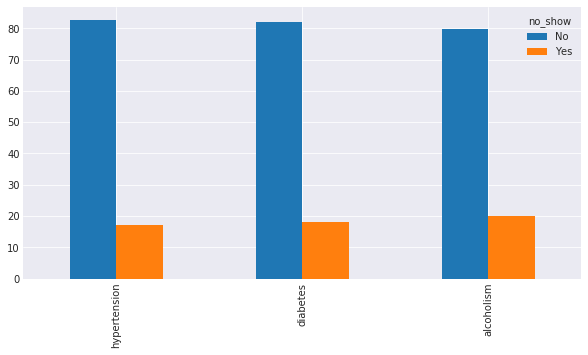

In [45]:
frames_2 = [hypertension_attendance_percentage, diabetes_attendance_percentage, alcoholism_attendance_percentage]
result = pd.concat(frames_2, keys=['hypertension', 'diabetes', 'alcoholism'])
result.unstack().plot(kind='bar', figsize=(10,5));

### Research question 3 (Did sending a sms affect the attendance of the patient of their medical appointment?)

In [46]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.089218,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [47]:
recieved_sms_count = df.groupby(['sms_received','no_show']).size()
recieved_sms_count

sms_received  no_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
dtype: int64

In [48]:
#total number of patients that recieved a message
recieved_sms_total = recieved_sms_count[1].sum()
recieved_sms_total

35482

In [49]:
#total number of patients that didn't recieved a message
recieved_no_sms_total = recieved_sms_count[0].sum()
recieved_no_sms_total

75045

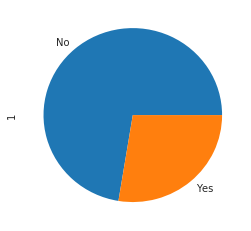

In [50]:
#piechart to compare the number of patients that recieved a message who showed up and didn't show up for their appointment
recieved_sms_count.unstack().iloc[1].plot(kind = 'pie',figsize=(4,4));

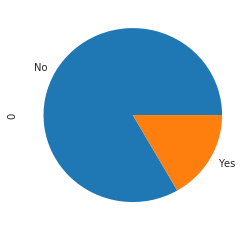

In [51]:
#piechart to compare the number of patients that didn't recieved a message who showed up and didn't show up for their appointment
recieved_sms_count.unstack().iloc[0].plot(kind = 'pie',figsize=(4,4));

In [52]:
#percentage of (patient that recieved a message) who attended and didn't attend their appointment
recieved_sms_percentage =  recieved_sms_count[1]*100/ recieved_sms_total
recieved_sms_percentage

no_show
No     72.425455
Yes    27.574545
dtype: float64

In [53]:
#percentage of alcoholic patient who attended and didn't attend their appointment
recieved_no_sms_percentage = recieved_sms_count[0]*100/recieved_no_sms_total
recieved_no_sms_percentage

no_show
No     83.296689
Yes    16.703311
dtype: float64

from this analysis we can dedude that:
35482 patients recieved a message and 72% of them were in attendance
75045 patients didn't recieved a message and 83% of them were in attendance

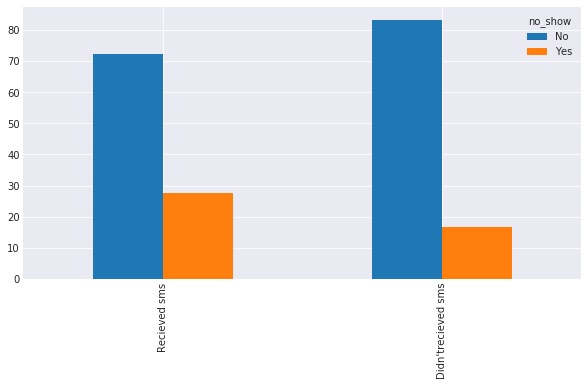

In [54]:
frames_3 = [recieved_sms_percentage, recieved_no_sms_percentage]
result = pd.concat(frames_3, keys=['Recieved sms', 'Didn\'trecieved sms'])
result.unstack().plot(kind='bar', figsize=(10,5));

<a id='conclusions'></a>
## Conclusions
<ul>
<li> Patients in the the senior adult age group (60+) showed up the most for their appointment, while teenagers (13 - 19) showed up the least.
<li> Hypertensive patients showed up the most.
<li> Receiving a message did not increase the attendance of patients to their appointment.
</ul>

### Limitations 

<ul>
    <li>Having to replace the incorrect value in the age column with the column's mean value without investigating what the real value is.</li>
    <li> Not knowing what the meaning of every columns heading eg the handcap column.</li>
</ul>

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0